In [1]:
import torch
import torch.nn as nn

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.get_dataset_names()

C:\Users\Joseph\anaconda3\envs\pytorchenv\lib\site-packages\seaborn\utils.py:376: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file C:\Users\Joseph\anaconda3\envs\pytorchenv\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [3]:
df = sns.load_dataset('flights')

In [4]:
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


Text(0, 0.5, 'Number of passengers')

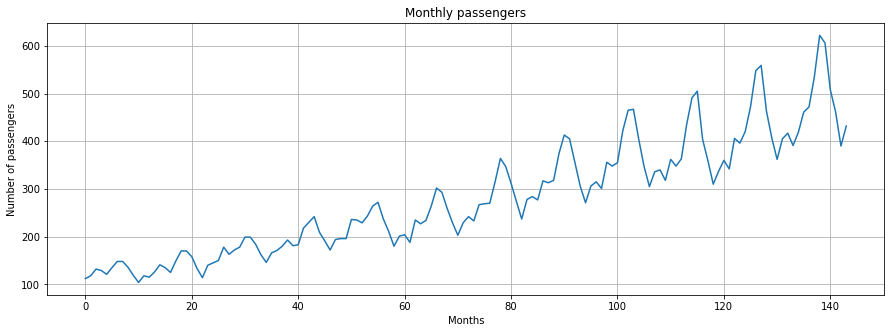

In [9]:
plt.figure(figsize=(15,5))
plt.grid(True)
plt.plot(df.passengers)
plt.title('Monthly passengers')
plt.xlabel('Months')
plt.ylabel('Number of passengers')

In [10]:
all_data = df.passengers.values.astype(float)

In [12]:
test_size = 15
train_data = all_data[:-test_size]
test_data = all_data[-test_size:]

In [17]:
lst = list(range(len(all_data)))

In [18]:
lst

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143]

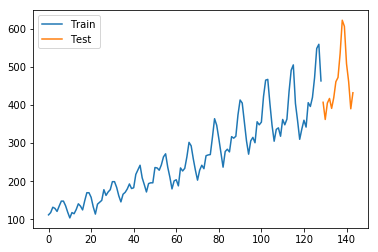

In [20]:
plt.plot(lst[:-test_size],train_data)
plt.plot(lst[-test_size:],test_data)
plt.legend(['Train','Test'])

In [22]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(-1,1))
tr_norm = sc.fit_transform(train_data.reshape(-1,1))

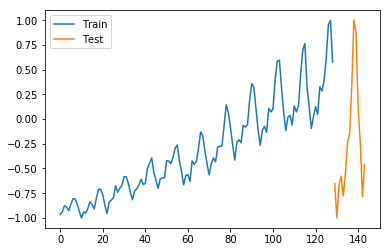

In [25]:
plt.plot(lst[:-test_size],tr_norm)
plt.plot(lst[-test_size:],sc.fit_transform(test_data.reshape(-1,1)))
plt.legend(['Train','Test'])

In [26]:
tr_norm = torch.FloatTensor(tr_norm).view(-1)

In [28]:
tr_norm.shape

torch.Size([129])

In [50]:
def cr_input(input_data,win_size):
    inp_seq = []
    L = len(input_data)
    for i in range(L-win_size):
        tr_seq = input_data[i:i+win_size]
        tr_label = input_data[i + win_size: i + win_size + 1]
        inp_seq.append((tr_seq,tr_label))
    return inp_seq

In [51]:
vals = np.arange(20)

In [53]:
tr_inp_seq = cr_input(tr_norm,10)

In [54]:
tr_inp_seq[0]

(tensor([-0.9648, -0.9385, -0.8769, -0.8901, -0.9253, -0.8637, -0.8066, -0.8066,
         -0.8593, -0.9341]),
 tensor([-1.]))

In [68]:
class NN(nn.Module):
    def __init__(self,input_size=1,hidden_size=100,output_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        
        # Add an LSTM layer:
        self.lstm = nn.LSTM(input_size,hidden_size)
        
        # Add a fully-connected layer:
        self.linear = nn.Linear(hidden_size,output_size)
        
        # Initialize h0 and c0:
        self.hidden = (torch.zeros(1,1,self.hidden_size),
                       torch.zeros(1,1,self.hidden_size))

    def forward(self,seq):
        lstm_out, self.hidden = self.lstm(
            seq.view(len(seq),1,-1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]  # we only want the last value

In [69]:
torch.manual_seed(101)
model = NN()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

model

NN(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

In [70]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')
    
count_parameters(model)

   400
 40000
   400
   400
   100
     1
______
 41301


In [72]:
epochs = 100
for epoch in range(epochs):
    
    # extract the sequence & label from the training data
    for seq, y_train in tr_inp_seq:
        
        # reset the parameters and hidden states
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
    # print training result
    print(f'Epoch: {epoch+1:2} Loss: {loss.item():10.8f}')
    

Epoch:  1 Loss: 0.07741217
Epoch:  2 Loss: 0.04548943
Epoch:  3 Loss: 0.01741708
Epoch:  4 Loss: 0.00598553
Epoch:  5 Loss: 0.00024990
Epoch:  6 Loss: 0.00174813
Epoch:  7 Loss: 0.00772054
Epoch:  8 Loss: 0.01605056
Epoch:  9 Loss: 0.02464294
Epoch: 10 Loss: 0.03060759
Epoch: 11 Loss: 0.03479150
Epoch: 12 Loss: 0.03529513
Epoch: 13 Loss: 0.03304023
Epoch: 14 Loss: 0.02516231
Epoch: 15 Loss: 0.01154908
Epoch: 16 Loss: 0.00037976
Epoch: 17 Loss: 0.01076630
Epoch: 18 Loss: 0.00450326
Epoch: 19 Loss: 0.00000002
Epoch: 20 Loss: 0.00046196
Epoch: 21 Loss: 0.00001332
Epoch: 22 Loss: 0.00000211
Epoch: 23 Loss: 0.00002655
Epoch: 24 Loss: 0.00002386
Epoch: 25 Loss: 0.00000863
Epoch: 26 Loss: 0.00003117
Epoch: 27 Loss: 0.00009265
Epoch: 28 Loss: 0.00012375
Epoch: 29 Loss: 0.00012834
Epoch: 30 Loss: 0.00012737
Epoch: 31 Loss: 0.00013601
Epoch: 32 Loss: 0.00015966
Epoch: 33 Loss: 0.00020041
Epoch: 34 Loss: 0.00026163
Epoch: 35 Loss: 0.00034572
Epoch: 36 Loss: 0.00044665
Epoch: 37 Loss: 0.00054274
E

In [77]:
future = 15
win_size = 10
preds = tr_norm[-win_size:].tolist()
model.eval()

for i in range(future):
    seq = torch.FloatTensor(preds[-win_size:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        preds.append(model(seq).item())
        
        

In [81]:
preds[-future:]

[0.10087718814611435,
 -0.041573815047740936,
 -0.024051934480667114,
 0.09032085537910461,
 0.028205620124936104,
 0.24355202913284302,
 0.2207552194595337,
 0.3363279700279236,
 0.5761734247207642,
 0.9494802355766296,
 0.9962279796600342,
 0.5287824273109436,
 0.09337123483419418,
 -0.10988891869783401,
 -0.034487590193748474]

In [82]:
true_predictions = sc.inverse_transform(np.array(preds[win_size:]).reshape(-1, 1))
true_predictions

array([[505.11403446],
       [486.59540404],
       [488.87324852],
       [503.7417112 ],
       [495.66673062],
       [523.66176379],
       [520.69817853],
       [535.7226361 ],
       [566.90254521],
       [615.43243062],
       [621.50963736],
       [560.74171555],
       [504.13826053],
       [477.71444057],
       [487.51661327]])

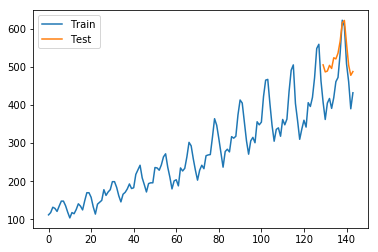

In [85]:
plt.plot(lst,df.passengers)
plt.plot(lst[-test_size:],true_predictions)
plt.legend(['Train','Test'])

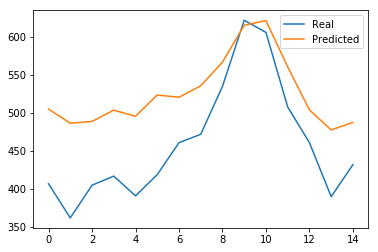

In [87]:
plt.plot(test_data)
plt.plot(true_predictions)
plt.legend(['Real','Predicted'])

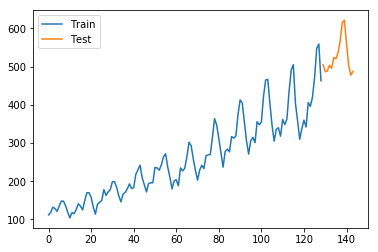

In [89]:
plt.plot(lst[:-test_size],train_data)
plt.plot(lst[-test_size:],true_predictions)
plt.legend(['Train','Test'])